# Практическая работа №3: Регрессионный анализ
Выполнила студентка гр. 1375 Суровяткина Ксения. Вариант №26

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения

* **Регрессионная модель:**
$$\mathbb{E}\left(Y|z\right) = f_{\theta}(z)$$

* **Линейная регрессионная модель:**
$$\mathbb{E}_{\theta}\left(Y|z\right) = x(z)^{\intercal}\vec{\beta}$$
где $x(z)$ - вектор регрессоров, однозначно зависящий от $z$(ковариата).

* Альтернативная форма записи модели линейной регрессии: $Y = X^{\intercal}\vec{\beta} + \epsilon$ ,где $\mathbb{E}_{\theta}\epsilon = 0$ , $\mathrm{Var}_{\theta}\epsilon = \sigma^2E$

* **МНК-оценка:**
$$\mathrm{RSS}(\beta) = ||Y - X^{\intercal}\beta||^2 = \left(Y - X^{\intercal}\beta\right)^{\intercal}\left(Y - X^{\intercal}\beta\right) \rightarrow \min_{\beta}$$

* Решение системы нормальных уравнений в ркгулярном случае: $\hat{\beta} = \left(XX^{\intercal}\right)^{-1}XY$

* **Оценка параметра $\sigma^2$:** $s^2 = \large \frac{\mathrm{SSe}}{n - r} \normalsize = \large \frac{\mathrm{RSS}(\hat{\beta})}{n - r}$ - несмещённая оценка дисперсии, где $r$ - ранг матрицы $X$

* **Линейная функция параметра:**
$$\psi(\beta) = C^{\intercal}\beta$$

* Функция параметра $\psi(\beta)$ **допускает несмещённое оценивание** (ДНО), если
$$\exists L(Y) = BY: \forall \beta\mathbb{E}_{\beta}L(Y) = C^{\intercal}\beta$$

* ***Теорема Гаусса-Маркова***
В модели линейной регрессии любая ДНО-функция параметра $\psi = C^{\intercal}\beta$ , $C = \begin{pmatrix} c_1, & \ldots , & c_m \end{pmatrix}^{\intercal}$ имеет НРМД-оценку $\hat{\psi}$. Эта оценка единственная в классе линейных несмещённых оценок и равна:
$$\hat{\psi} = \sum \limits_{j = 1}^m c_j \hat{\beta_j}$$
где $\hat{\beta}$ - произвольное решение системы нормальных уравнений.

* **Доверительный интервал уровня доверия $1 - \alpha$:**
$$\left[\widehat{\psi} - x_{\alpha}s\sqrt{b}, \widehat{\psi} + x_{\alpha}s\sqrt{b}\right] \ni \psi$$
где $x_{\alpha}: \mathrm{S}_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$ - квантиль, $\large \frac{\hat{\psi} - \psi}{s \sqrt{b}} \normalsize \sim S_{n -r}$ - распределение, $b_{\psi} = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$ - элемент дисперсии оценки

* **Доверительный эллипосид уровн доверия $1 - \alpha$ функции параметра $\psi$:**
$$A_{\alpha} = \left\{\vec{x}: \left(\vec{x} - \hat{\psi}\right)^{\intercal}B^{-1}\left(\vec{x} - \hat{\psi}\right) \leq qs^2x_{\alpha}\right\}$$
где $\large \frac{\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right)}{qs^2} \normalsize \sim \mathcal{F}_{q, n - r}$ - распределение, $x_{\alpha}: \mathrm{F}_{q, n - r}(x_{\alpha}) = 1 - \alpha$ - квантиль, $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

* **$\mathbb{F}$ - статистика:**
$$\mathbb{F} = \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \sim \mathcal{F}_{q, n - r}$$
где $\mathrm{SS}_H = \mathrm{RSS}(\hat{\beta}_H) - \mathrm{RSS}(\hat{\beta})$ , $\hat{\beta}_H$ - МНК-оценка параметра при выполнении основной гипотезы, $\mathrm{SSe} = \mathrm{RSS}(\hat{\beta}) = s^2(n - r)$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Результаты статического экспериметка приведены в таблице. Требуется оценить характер (случайной) зависимости пременной $Y$ от переменной $X$.

### 1. Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линии регрессии. Оценить визуально соответсвие полученных данных и построенной оценки.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2, norm, kstest, kstwobign, t, f
import statistics as stat

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
X,4.00,5.00,1.00,2.00,2.00,3.00,5.00,3.00,3.00,3.00,...,2.00,2.00,2.00,1.00,3.00,4.00,2.00,3.00,2.00,3.00
Y,11.27,5.03,9.52,2.11,13.84,4.64,10.62,4.04,8.44,0.21,...,2.41,2.55,12.61,1.57,11.98,25.42,12.19,9.92,5.59,7.16


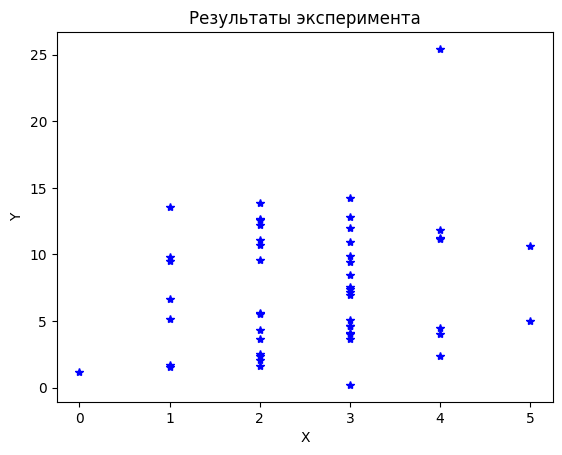

In [33]:
X = [4, 5, 1, 2, 2, 3, 5, 3, 3, 3,\
     4, 3, 3, 3, 4, 3, 2, 1, 4, 3,\
     2, 3, 3, 1, 3, 2, 2, 3, 1, 2,\
     1, 4, 1, 3, 2, 3, 4, 2, 0, 2,\
     2, 2, 2, 1, 3, 4, 2, 3, 2, 3]
Y = [11.27, 5.03, 9.52, 2.11, 13.84,\
    4.64, 10.62, 4.04, 8.44, 0.21, 4.05,\
    4.61, 7.58, 7.42, 11.15, 5.09, 9.56,\
    9.83, 11.87, 4.12, 10.72, 6.95, 10.90,\
    5.18, 3.65, 4.33, 12.65, 9.47, 1.73, 3.69,\
    6.65, 2.41, 13.56, 14.20, 5.50, 12.80, 4.50,\
    1.64, 1.19, 11.08, 2.41, 2.55, 12.61, 1.57,\
    11.98, 25.42, 12.19, 9.92, 5.59, 7.16]
data = [X, Y]
n = len(X)

plt.plot(X, Y, 'b*')
plt.title('Результаты эксперимента')
plt.xlabel('X')
plt.ylabel('Y');

table = pd.DataFrame(data, columns=[i for i in range(1, n + 1)], index=['X', 'Y'])
table

* МНК оценки $\beta_0$ (параметр сдвига) и $\beta_1$ (параметр масштаба):

Линейная регрессионная модель: $Y = \beta_0 + \beta_1X  + \epsilon$

Решение системы нормальных уравнений в регулярном случае:
 
$X = \begin{pmatrix} 1 & 1  & 1 & \cdots & 1 \\ x_1 & x_2 & x_3 & \cdots & x_{50}\end{pmatrix}$

$XX^{\intercal} = \begin{pmatrix} 1 & 1  & 1 & \cdots & 1 \\ x_1 & x_2 & x_3 & \cdots & x_{50}\end{pmatrix} \cdot \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ 1 & x_3\\ \vdots & \vdots \\ 1 & x_{50} \end{pmatrix} = \begin{pmatrix}50 & 129 \\ 129 & 391 \end{pmatrix}$

$\mathrm{det}\left(XX^{\intercal}\right) = 2909$ - невырожденная, следовательно можно найти обратную матрицу.

$\left(XX^{\intercal}\right)^{-1} = \frac{1}{2909} \cdot \begin{pmatrix}391 & -129 \\ -129 & 50 \end{pmatrix}$

Тогда, $\widehat{\beta} = \left(XX^{\intercal}\right)^{-1}XY = \begin{pmatrix} 5.32 \\ 0.88 \end{pmatrix} \rightarrow Y \approx 5.32 + 0.88X$

XX^T =
 [[ 50 129]
 [129 391]]
det = 2909.0000000000005
beta_0 = 5.317342729460287
beta_1 = 0.8785493296665519


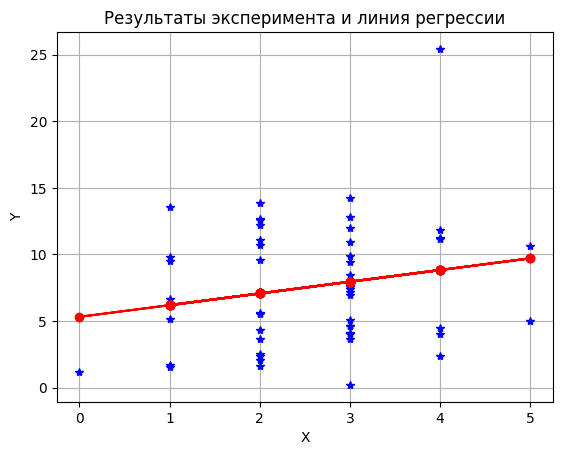

In [34]:
X_1 = [np.array([1]*n), np.array(X)] # X =  1    1    1  ...   1
                                     #     x_1  x_2  X_3 ...  x_50
XT = np.transpose(X_1) #транспонирование матрицы Х
XXT = np.matmul(X_1, XT) #произведение XX^T
print('XX^T =\n', XXT)

det = np.linalg.det(XXT)#определитель матрицы XX^T
print('det =', det)

XXT_inv = np.linalg.inv(XXT)#обратная матрица XX^T
cur_beta = np.matmul(XXT_inv, X_1)
beta_hat = np.matmul(cur_beta, np.transpose(Y))#бета с крышкой
print('beta_0 =', beta_hat[0])
print('beta_1 =', beta_hat[1])

Y_1 = beta_hat[0] + beta_hat[1]*np.array(X) # регрессионная модель

plt.title('Результаты эксперимента и линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.plot(X, Y, 'b*')
plt.plot(X, Y_1, 'ro-');

По графику видно, что результаты эксперимента сильно отклоняются от полученной линии регрессии.

### 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h = 2.80$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha = 0.10$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визульно оценить данный факт.

Несмещённая оценка параметра $\sigma^2$:

 $s^2 = \frac{RSS(\widehat \beta)}{n - r} = \frac{1}{n - r} \cdot \sum \limits_{i = 1}^n\left(Y_i - \sum \limits_{j = 1}^m x_{ij} \widehat{\beta_j} \right)^2 = \frac{1}{n - r} \cdot \sum \limits_{i = 1}^n\left(Y_i - \widehat{\beta_0} - \widehat{\beta_1}X_i\right)^2$, где $r = 2$ - ранг матрицы $X$

In [35]:
sum_2 = np.sum((Y - beta_hat[0] - beta_hat[1] * np.array(X))**2) # сумма квадратов
s2 = sum_2 / (n - len(beta_hat))
print('Несмещённая оценка дисперсии s^2 =', s2)

Несмещённая оценка дисперсии s^2 = 22.154000615904664


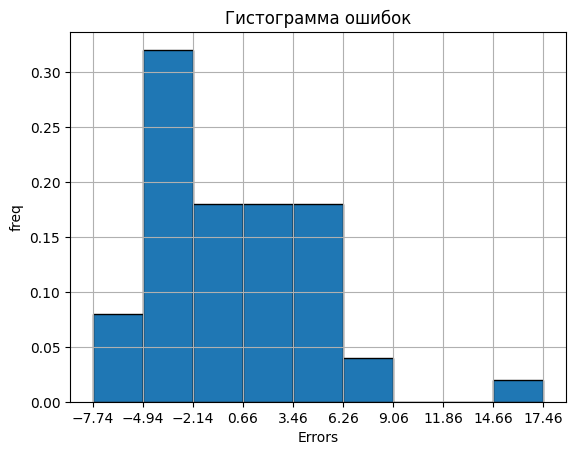

In [36]:
h = 2.8
errors = Y - Y_1 #ошибки
errors = sorted(errors) #сортировка ошибок
bins = np.arange(min(errors), max(errors) + h, h) 
plt.xticks(bins)

#построение гистограммы с шагом h
y, edges, _= plt.hist(errors, edgecolor='black', bins=bins, weights=np.ones_like(errors) / n) 
plt.grid()
plt.title('Гистограмма ошибок')
plt.xlabel('Errors')
plt.ylabel('freq');

* **Проверка гипотезы нормальности**

Основная гипотеза $H_0$: $\vec{\epsilon} \sim \mathcal{N}(0, \sigma^2)$

Разобьём числовую прямую на отрезки $G_1 = \left(- \infty, -4.68\right],  G_2 = \left(-4.68, -2.7\right],  G_3 = \left(-2.7, -0.53\right], G_4 = \left(-0.53, 2.34 \right], G_5 = \left(2.34, + \infty\right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x)$ - плотность нормального распределения.<br>
$\mathbb{P}_{1} = 0.16 \rightarrow n\mathbb{P}_1 = 8$ 

$\mathbb{P}_{2} = 0.12 \rightarrow n\mathbb{P}_2 = 6.15$

$\mathbb{P}_{3} = 0.17 \rightarrow n\mathbb{P} _3 = 8.6$

$\mathbb{P}_{4} = 0.24 \rightarrow n\mathbb{P} _3 = 11.76$

$\mathbb{P}_{5} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 + \mathbb{P}_{4}\right) = 0.31 \rightarrow n\mathbb{P}_5 = 15.48$

In [37]:
a = 0
sigma = s2**0.5
alpha = 0.1

edges = [-4.68, -2.7, -0.53, 2.34, 17.46] #интервалы

#подсчёт вероятностей
p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = norm.cdf(edges[3], a, sigma) - norm.cdf(edges[2], a, sigma)
p5 = 1 - p1 - p2 - p3 - p4
print('P1 = ', p1, ', n*P1 = ', n * p1)
print('P2 = ', p2, ', n*P2 = ', n * p2)
print('P3 = ', p3, ', n*P3 = ', n * p3)
print('P4 = ', p4, ', n*P4 = ', n * p4)
print('P5 = ', p5, ', n*P5 = ', n * p5)

#количество значений, попавших в интервал
groups = [[],[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in errors:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1
        
n1, n2, n3, n4, n5 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3]), len(groups[4])
#print(groups)
print('n1 = ', n1, ', n2 = ', n2, ', n3 = ', n3, ', n4 = ', n4, 'n5 = ', n5)

P1 =  0.16003711864015452 , n*P1 =  8.001855932007725
P2 =  0.12306938020585195 , n*P2 =  6.153469010292597
P3 =  0.17206617223700693 , n*P3 =  8.603308611850347
P4 =  0.23528663127123195 , n*P4 =  11.764331563561598
P5 =  0.30954069764575454 , n*P5 =  15.477034882287727
n1 =  6 , n2 =  14 , n3 =  6 , n4 =  7 n5 =  17


In [38]:
#критерий
chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4) + ((n5 - n*p5)**2) / (n*p5)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha, 2))

Статистика критерия:  13.373304875588854
Табличное значение: 4.605170185988092


Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^5 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 13.37$<br><br>
Из таблицы (дополнительно посчитано в коде): $\chi_{k-d-1, \alpha}^2 = \chi_{2, 0.1}^2 = 4.61$

In [39]:
if chi > chi2.ppf(1 - alpha, 2):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

Гипотеза отвергается


Так как $\chi^2 > \chi_{2, 0.1}^2$ , то гипотеза отвергается.

* **Оценка расстояния до класса нормальных распределений по Колмогорову**

Вычислим выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$ используя Scipy

In [40]:
sigma = np.sqrt(s2)

cdf = lambda x: norm.cdf(x, loc = 0, scale = sigma)
Dn, _ = kstest(errors, cdf)
eta = n**0.5 * Dn
print('Критерий Колмогорова: ', eta)

Критерий Колмогорова:  0.8490949272572775


Зададим уровень значимости $\alpha = 0.1$. Вычислим квантиль Колмогорова $d_{1 - \alpha}$, чтобы построить критическую область $V_k = (d_{1 - \alpha},+ \infty)$

In [41]:
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', d)

Квантиль:  1.2238478702170825


$V_k = (1.22, + \infty)$

$\eta \notin V_k \Rightarrow$ нет оснований отвергнуть гипотезу.

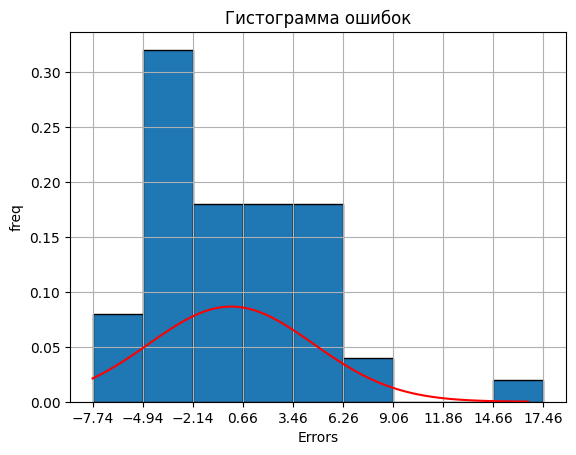

In [42]:

y, edges, _= plt.hist(errors, edgecolor='black', bins=bins, weights=np.ones_like(errors) / n) 
values = np.linspace(min(errors), max(errors), 100)
plt.plot(values, norm.pdf(values, np.array(errors).mean(), np.array(errors).std()), color='red')
plt.grid()
plt.xticks(bins)
plt.title('Гистограмма ошибок')
plt.xlabel('Errors')
plt.ylabel('freq');

Визуально видно, что распределение ошибок сильно отличается от нормального.

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

* **Доверительный интервал**

ДНО-функция: $\psi = C^{\intercal}\beta$

МНК-оценка: $\widehat{\psi} = C^{\intercal}\widehat{\beta}$

Для $\beta_0$: $C = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

Для $\beta_1$: $C = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

Элемент дисперсии оценки: $b_{\psi} =  C^{\intercal} \left(XX^{\intercal}\right)^{-1}C$

$\Large \frac{\widehat{\psi} - \psi}{s\sqrt{b}} \normalsize \sim S_{n-r}$ , где $r = 2$

Доверительный интервал уровня доверия $1 - \alpha$:

$$\left[\widehat{\psi} - x_{\alpha}s\sqrt{b}, \widehat{\psi} + x_{\alpha}s\sqrt{b}\right] \ni \psi$$
где $x_{\alpha}: \mathrm{S}_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [43]:
# x_alpha
alpha = 0.1
r = 2
df = n - r
x_alpha = t.ppf(1 - alpha/2, df)
print('x_alpha =', x_alpha)

#границы интервала beta_0
CT_0 = np.array([1.0, 0.0])
b_0 = np.dot(np.dot(CT_0, XXT_inv), np.transpose(CT_0))
psi_hat = np.matmul(CT_0, beta_hat)
left_0 = psi_hat - x_alpha * (s2 * b_0)**0.5
right_0 = psi_hat + x_alpha * (s2 * b_0)**0.5
print('Доверительный интервал для beta_0', [left_0, right_0])

#границы интервала beta_1
CT_1 = np.array([0.0, 1.0])
b_1 = np.dot(np.dot(CT_1, XXT_inv), np.transpose(CT_1))
psi_hat = np.matmul(CT_1, beta_hat)
left_1 = psi_hat - x_alpha * (s2 * b_1)**0.5
right_1 = psi_hat + x_alpha * (s2 * b_1)**0.5
print('Доверительный интервал для beta_1', [left_1, right_1])

x_alpha = 1.6772241953450393
Доверительный интервал для beta_0 [2.423108212689163, 8.21157724623141]
Доверительный интервал для beta_1 [-0.1564268205256507, 1.9135254798587544]


* **Доверительный эллипс**

$\large \frac{\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right)}{qs^2} \normalsize \sim \mathcal{F}_{q, n - r}$

Квантиль: $x_{\alpha} : \mathrm{F}_{q, n - r}(x_{\alpha}) = 1 - \alpha = 1 - 0.1 = 0.9$

$A_{\alpha} = \left\{\vec{x} : \left(\vec{x} - \widehat{\psi}\right)^{\intercal}B^{-1} \left(\vec{x} - \widehat{\psi}\right) \leq qs^2x_{\alpha}\right\}$ , где $x_{\alpha} : \mathrm{F}_{q, n-r} = 1 - \alpha$, $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix}$

Тогда, $\begin{pmatrix} x \\ y \end{pmatrix} = P\left(\widehat{\psi} - \psi\right)$ , где $P$ - матрица собственных векторов матрицы $XX^{\intercal}$.

Тогда, уравнение доверительного эллипса выглядит так:

$\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right) = \lambda_1x^2 + \lambda_2y^2 \leq qs^2x_{\alpha}$

Таким образом $\large \frac{\lambda_1x^2}{qs^2x_{\alpha}} + \frac{\lambda_2y^2}{qs^2x_{\alpha}} \normalsize \leq 1$, где $q = 2$ - размер модели

In [44]:
#матрица собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(np.array(XXT))
print('P =\n', eigenvectors)

P =
 [[-0.94801561 -0.31822381]
 [ 0.31822381 -0.94801561]]


$ P\left(\widehat{\psi} - \psi\right) = \begin{pmatrix} -0.95 & -0.32 \\ 0.32 & -0.95\end{pmatrix} \begin{pmatrix} 5.32 - \beta_0 \\ 0.88 - \beta_1 \end{pmatrix} = \begin{pmatrix} -5.3356 + 0.95\beta_0 + 0.32\beta_1 \\ 0.8664 - 0.32\beta_0 + 0.95\beta_1\end{pmatrix}$

x_alpha = 2.416660110053031


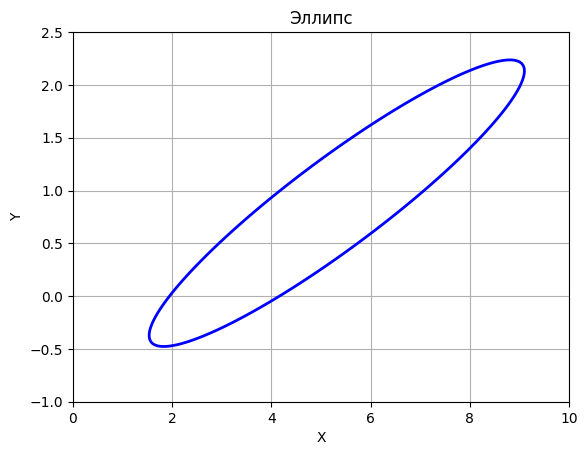

In [45]:
q = 2
x_alpha_1 = f.ppf(1 - alpha, q, n - r)
print('x_alpha =', x_alpha_1)
a = eigenvalues[0] / (q*s2*x_alpha_1)
b = eigenvalues[1] / (q*s2*x_alpha_1)

#функция подсчёта значений уравнения
def ellipse(b1, b2):
  return (( -5.3356 + 0.95 * b1 + 0.32 * b2)**2 * a) + (( 0.8664 - 0.32 * b1 + 0.95 * b2)**2 * b)

#Сетка
x = np.linspace(0, 10, 200)
y = np.linspace(-1, 2.5, 200)
X_plot, Y_plot = np.meshgrid(x, y)

#График
plt.contour(X_plot, Y_plot, ellipse(X_plot, Y_plot), levels=[1], colors='blue', linewidths=2)
plt.title("Эллипс")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

Полуоси эллипса:

$\large \frac{\lambda_1x^2}{qs^2x_{\alpha}} + \frac{\lambda_2y^2}{qs^2x_{\alpha}} \normalsize = 1$

Отсюда следует, что $a = \large \sqrt{\frac{\lambda_1}{qs^2x_{\alpha}}}$ - малая полуось, $b = \large \sqrt{\frac{\lambda_2}{qs^2x_{\alpha}}}$ - большая полуось

In [46]:
# расчёт малой полуоси
a_ellipse = (eigenvalues[0] / (q*s2*x_alpha_1))**0.5
print('Малая полуось а =', a_ellipse)

#расчёт большой полуоси
b_ellipse = (eigenvalues[1] / (q*s2*x_alpha_1))**0.5
print('Большая полуось b =', b_ellipse)

Малая полуось а = 0.25010774032640204
Большая полуось b = 2.013942168888041


### 4. Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Нулевая гипотеза: $H_0: \beta_1 = 0$

Альтернативная гипотеза: $H_A: \beta_1 \neq 0$

$\mathbb{F}$-статистика: $\mathbb{F} =\large \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \normalsize = \large \frac{\widehat{\psi}^{\intercal}B^{-1}\widehat{\psi}}{qs^2} \sim \mathcal{F}_{q, n - r}$ , $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$ , $q = 1$

Так как при нулевой гипотезе $\beta_0 = 0$, то $C = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Тогда $\widehat{\psi} = C^{\intercal}\widehat{\beta} = \widehat{\beta_1}$, а значит $\mathbb{F} = \large \frac{\widehat{\beta_1}^2}{bqs^2}$

Квантиль: 

$x_{\alpha}: \mathrm{F}(x_{\alpha}) = 1 - \alpha = 0.9 \rightarrow x_{\alpha} = 2.42$

In [47]:
#квантиль
x_alpha_2 = x_alpha_1
print('x_alpha =', x_alpha_2)

#статистика критерия
q = 1
C = np.array([0, 1])
b = np.matmul(np.matmul(np.transpose(C), XXT_inv), C)
F = (beta_hat[1]**2) / (b*q*s2)
print('Статистика F-критерия:', F)

#табличное значение
q, r = 1, 2
alpha = 0.1
F_q_n_r = f.ppf(1 - alpha, q, n - r)
print('Табличное значение:', F_q_n_r)

x_alpha = 2.416660110053031
Статистика F-критерия: 2.02700050501657
Табличное значение: 2.813081004064934


Так как статистика критерия меньше табличного значения, то нет оснований отвергнуть данную гипотезу.

### 5. Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0$, $\beta_1$, $\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.

* МНК оценки $\beta_0$, $\beta_1$, $\beta_2$:

Квадратичная регрессионная модель: $Y = \beta_0 + \beta_1X  + \beta_2X^2 + \epsilon$

Решение системы нормальных уравнений в регулярном случае:
 
$X = \begin{pmatrix} 1 & 1  & 1 & \cdots & 1 \\ x_1 & x_2 & x_3 & \cdots & x_{50} \\ x_1^2 & x_2^2 & x_3^2 & \cdots & x_{50}^2\end{pmatrix}$

$XX^{\intercal} = \begin{pmatrix} 1 & 1  & 1 & \cdots & 1 \\ x_1 & x_2 & x_3 & \cdots & x_{50} \\ x_1^2 & x_2^2 & x_3^2 & \cdots & x_{50}^2\end{pmatrix} \cdot \begin{pmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ 1 & x_3 & x_3^2\\ \vdots & \vdots & \vdots \\ 1 & x_{50} & x_{50}^2 \end{pmatrix} = \begin{pmatrix}50 & 129 & 391\\ 129 & 391 & 1311 \\ 391 & 1311 & 4747 \end{pmatrix}$

Тогда, $\widehat{\beta} = \left(XX^{\intercal}\right)^{-1}XY = \begin{pmatrix} 4.37 \\ 1.76 \\ -0.17 \end{pmatrix} \rightarrow Y \approx 4.37 + 1.76X - 0.17X^2$

XX^T =
 [[  50  129  391]
 [ 129  391 1311]
 [ 391 1311 4747]]
beta_0 = 4.366629301415605
beta_1 = 1.763278397974456
beta_2 = -0.17031810334906433


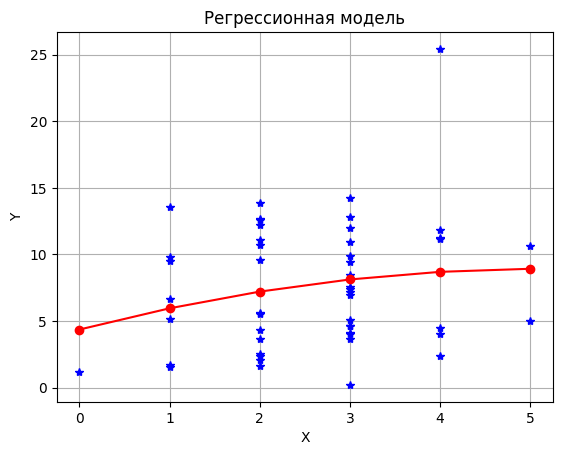

In [48]:
X2 = [i**2 for i in X]
X_2 = [np.array([1]*n), X, X2] # матрица Х с доп строкой х^2
XT_2 = np.transpose(X_2) # транспонированная матрица Х
XXT_2 = np.matmul(X_2, XT_2) # матрица ХХ^T
print('XX^T =\n', XXT_2)

XXT_inv_2 = np.linalg.inv(XXT_2) #обратная матрица XX^T
cur_beta_2 = np.matmul(XXT_inv_2, X_2)
beta_hat_2 = np.matmul(cur_beta_2, np.transpose(Y)) #бета с крышкой
print('beta_0 =', beta_hat_2[0])
print('beta_1 =', beta_hat_2[1])
print('beta_2 =', beta_hat_2[2])

#регресиионная модель
x_values = np.unique(X)
Y_2 = beta_hat_2[0] + beta_hat_2[1] * x_values + beta_hat_2[2] * x_values**2

plt.title('Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.plot(X, Y, 'b*')
plt.plot(x_values, Y_2,'ro-');

### 6. Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

 $s^2 = \frac{RSS(\widehat \beta)}{n - r} = \frac{1}{n - r} \cdot \sum \limits_{i = 1}^n\left(Y_i - \sum \limits_{j = 1}^m x_{ij} \widehat{\beta_j} \right)^2 = \frac{1}{n - r} \cdot \sum \limits_{i = 1}^n\left(Y_i - \widehat{\beta_0} - \widehat{\beta_1}X_i - \widehat{\beta_2}X_i^2\right)^2$, где $r = 3$ - ранг матрицы $X$

In [49]:

sum2_2 = np.sum((Y - beta_hat_2[0] - beta_hat_2[1] * np.array(X) - beta_hat_2[2]*np.array(X2))**2)
s2_2 = sum2_2 / (n - len(beta_hat_2))
print('Несмещённая оценка дисперсии s^2 =', s2_2)

Несмещённая оценка дисперсии s^2 = 22.551621193438514


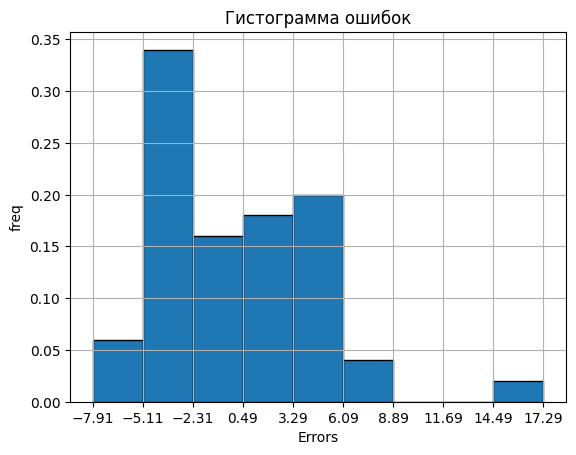

In [50]:
h = 2.8
Y_2 = beta_hat_2[0] + beta_hat_2[1] * np.array(X) + beta_hat_2[2] * np.array(X)**2
errors_2 = Y - Y_2
errors_2 = sorted(errors_2)
bins_2 = np.arange(min(errors_2), max(errors_2) + h, h)
plt.xticks(bins_2)

#построение гистограммы
y_2, edges_2, _= plt.hist(errors_2, edgecolor='black', bins=bins_2, weights=np.ones_like(errors_2) / n) 
plt.grid()
plt.title('Гистограмма ошибок')
plt.xlabel('Errors')
plt.ylabel('freq');

* **Проверка гипотезы нормальности**

Основная гипотеза $H_0$: $\vec{\epsilon} \sim \mathcal{N}(0, \sigma^2)$

Разобьём числовую прямую на отрезки $G_1 = \left(- \infty, -4.20\right],  G_2 = \left(-4.20, -2.7\right],  G_3 = \left(-2.7, 1.69\right], G_4 = \left(1.69, 3.86 \right], G_5 = \left(3.86, 5.4 \right]G_6 = \left(5.4, + \infty\right)$

Рассмотрим $\mathbb{P}_{k} = \mathbb{P}_{\theta}\left(x_i \in G_k\right) = \sum \limits_{x \in G_k} p_{\theta}(x)$, где $p_{\theta}(x)$ - плотность нормального распределения.<br>
$\mathbb{P}_{1} = 0.05 \rightarrow n\mathbb{P}_1 = 2.39$ 

$\mathbb{P}_{2} = 0.09 \rightarrow n\mathbb{P}_2 = 4.65$

$\mathbb{P}_{3} = 0.17 \rightarrow n\mathbb{P} _3 = 8.61$

$\mathbb{P}_{4} = 0.23 \rightarrow n\mathbb{P} _3 = 11.48$

$\mathbb{P}_{5} = 0.22 \rightarrow n\mathbb{P} _3 = 10.74$

$\mathbb{P}_{6} = 1 - \left(\mathbb{P}_{1} + \mathbb{P}_{2} + \mathbb{P}_3 + \mathbb{P}_{4} + \mathbb{P}_{5}\right) = 0.24 \rightarrow n\mathbb{P}_5 = 12.22$

In [51]:
a = 0
sigma_2 = s2_2**0.5

edges = [-4.20, -2.7, 1.69, 3.86, 5.4, 17.29] #интервалы

#подсчёт вероятностей
p1_2 = norm.cdf(edges_2[0], a, sigma_2)
p2_2 = norm.cdf(edges_2[1], a, sigma_2) - norm.cdf(edges_2[0], a, sigma_2)
p3_2 = norm.cdf(edges_2[2], a, sigma_2) - norm.cdf(edges_2[1], a, sigma_2)
p4_2 = norm.cdf(edges_2[3], a, sigma_2) - norm.cdf(edges_2[2], a, sigma_2)
p5_2 = norm.cdf(edges_2[4], a, sigma_2) - norm.cdf(edges_2[3], a, sigma_2)
p6_2 = 1 - p1_2 - p2_2 - p3_2 - p4_2 - p5_2
print('P1 = ', p1_2, ', n*P1 = ', n * p1_2)
print('P2 = ', p2_2, ', n*P2 = ', n * p2_2)
print('P3 = ', p3_2, ', n*P3 = ', n * p3_2)
print('P4 = ', p4_2, ', n*P4 = ', n * p4_2)
print('P5 = ', p5_2, ', n*P5 = ', n * p5_2)
print('P6 = ', p6_2, ', n*P5 = ', n * p6_2)

#количество значений, попавших в интервал
groups = [[],[],[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in errors_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1
        
n1_2, n2_2, n3_2, n4_2, n5_2, n6_2 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3]), len(groups[4]), len(groups[5])
#print(groups)
print('n1 = ', n1_2, ', n2 = ', n2_2, ', n3 = ', n3_2, ', n4 = ', n4_2, 'n5 = ', n5_2, 'n6 = ', n6_2)

P1 =  0.047814579089517056 , n*P1 =  2.3907289544758528
P2 =  0.09296859641912728 , n*P2 =  4.6484298209563635
P3 =  0.1722781455015691 , n*P3 =  8.613907275078455
P4 =  0.2277287569739168 , n*P4 =  11.386437848695842
P5 =  0.21475388411128638 , n*P5 =  10.737694205564319
P6 =  0.24445603790458348 , n*P5 =  12.222801895229175
n1 =  10 , n2 =  10 , n3 =  10 , n4 =  10 n5 =  5 n6 =  5


In [52]:
#критерий
alpha = 0.1
chi = ((n1_2 - n*p1_2)**2) / (n*p1_2) + ((n2_2 - n*p2_2)**2) / (n*p2_2) + ((n3_2 - n*p3_2)**2) / (n*p3_2)\
      + ((n4_2 - n*p4_2)**2) / (n*p4_2) + ((n5_2 - n*p5_2)**2) / (n*p5_2) + ((n6_2 - n*p6_2)**2) / (n*p6_2)
print("Статистика критерия: ", chi)
print('Табличное значение:', chi2.ppf(1 - alpha, 3))

Статистика критерия:  38.1060026527349
Табличное значение: 6.251388631170325


Тогда получилим статистику критерия $\chi^2 = \sum \limits_{i=1}^6 \large \frac{\left(n_i - n\mathbb{P}_i\right)^2}{n\mathbb{P}_i}  \normalsize = 38.1$<br><br>
Из таблицы (дополнительно посчитано в коде): $\chi_{k-d-1, \alpha}^2 = \chi_{3, 0.1}^2 = 4.61$

In [53]:
if chi > chi2.ppf(1 - alpha, 3):
    print('Гипотеза отвергается')
else:
    print('Гипотеза принимается')

Гипотеза отвергается


Так как $\chi^2 > \chi_{3, 0.1}^2$ , то гипотеза отвергается.

* **Оценка расстояния до класса нормальных распределений по Колмогорову**

Вычислим выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$ используя Scipy

In [54]:
sigma = np.sqrt(s2_2)

cdf = lambda x: norm.cdf(x, loc = 0, scale = sigma)
Dn, _ = kstest(errors_2, cdf)
eta = n**0.5 * Dn
print('Критерий Колмогорова: ', eta)

Критерий Колмогорова:  0.9053069998689578


Зададим уровень значимости $\alpha = 0.1$. Вычислим квантиль Колмогорова $d_{1 - \alpha}$, чтобы построить критическую область $V_k = (d_{1 - \alpha},+ \infty)$

In [55]:
d = kstwobign.ppf(1 - alpha)
print('Квантиль: ', d)

Квантиль:  1.2238478702170825


$V_k = (1.22, + \infty)$

$\eta \notin V_k \Rightarrow$ нет оснований отвергнуть данную гипотезу.

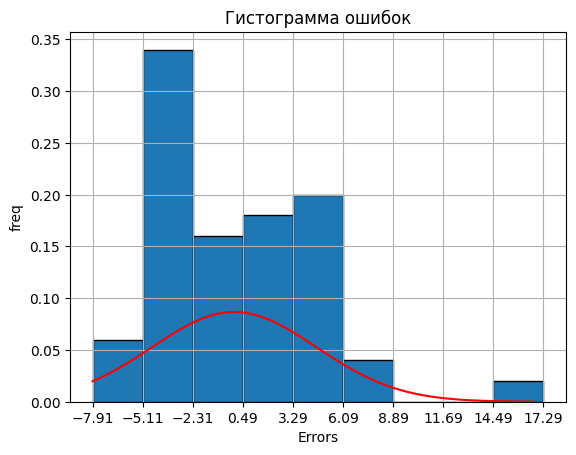

In [56]:
y_2, edges_2, _= plt.hist(errors_2, edgecolor='black', bins=bins_2, weights=np.ones_like(errors_2) / n) 
values_2 = np.linspace(min(errors_2), max(errors_2), 100)
plt.plot(values_2, norm.pdf(values_2, np.mean(errors_2), np.std(errors_2)), color='red')
plt.grid()
plt.xticks(bins_2)
plt.title('Гистограмма ошибок')
plt.xlabel('Errors')
plt.ylabel('freq');

Визуально видно, что распределение ошибок сильно отличается от нормального.

### 7. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$ уровня доверия $1 - \alpha$. Напистаь уравнение доверительного эллипсоида уровня доверия $1 - \alpha$.

* **Доверительный интервал**

Для $\beta_0$: $C = \begin{pmatrix} 1 \\ 0 \\ 0\end{pmatrix}$

Для $\beta_1$: $C = \begin{pmatrix} 0 \\ 1 \\ 0\end{pmatrix}$

Для $\beta_2$: $C = \begin{pmatrix} 0 \\ 0 \\ 1\end{pmatrix}$

Элемент дисперсии оценки: $b_{\psi} =  C^{\intercal} \left(XX^{\intercal}\right)^{-1}C$

$\Large \frac{\widehat{\psi} - \psi}{s\sqrt{b}} \normalsize \sim S_{n-r}$ , где $r = 3$

Доверительный интервал уровня доверия $1 - \alpha$:

$$\left[\widehat{\psi} - x_{\alpha}s\sqrt{b}, \widehat{\psi} + x_{\alpha}s\sqrt{b}\right] \ni \psi$$
где $x_{\alpha}: \mathrm{S}_{n-r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [57]:
# x_alpha
alpha = 0.1
r = 3
df = n - r
x_alpha = t.ppf(1 - alpha/2, df)
print('x_alpha =', x_alpha)

#границы интервала для beta_0
CT_0_2 = np.array([1.0, 0.0, 0.0])
b_0 = np.dot(np.dot(CT_0_2, XXT_inv_2), np.transpose(CT_0_2))
psi_hat_2 = np.matmul(CT_0_2, beta_hat_2)
left_0_2 = psi_hat_2 - x_alpha * (s2_2 * b_0)**0.5
right_0_2 = psi_hat_2 + x_alpha * (s2_2 * b_0)**0.5
print('Доверительный интервал для beta_0', [left_0_2, right_0_2])

#границы интервала для beta_1
CT_1_2 = np.array([0.0, 1.0, 0.0])
b_1 = np.dot(np.dot(CT_1_2, XXT_inv_2), np.transpose(CT_1_2))
psi_hat_2 = np.matmul(CT_1_2, beta_hat_2)
left_1_2 = psi_hat_2 - x_alpha * (s2_2 * b_1)**0.5
right_1_2 = psi_hat_2 + x_alpha * (s2_2 * b_1)**0.5
print('Доверительный интервал для beta_1', [left_1_2, right_1_2])

#границы интервала для beta_2
CT_2_2 = np.array([0.0, 0.0, 1.0])
b_2 = np.dot(np.dot(CT_2_2, XXT_inv_2), np.transpose(CT_2_2))
psi_hat_2 = np.matmul(CT_2_2, beta_hat_2)
left_2_2 = psi_hat_2 - x_alpha * (s2_2 * b_2)**0.5
right_2_2 = psi_hat_2 + x_alpha * (s2_2 * b_2)**0.5
print('Доверительный интервал для beta_2', [left_2_2, right_2_2])

x_alpha = 1.67792672077558
Доверительный интервал для beta_0 [-0.642598674784888, 9.375857277616099]
Доверительный интервал для beta_1 [-2.1649402796132513, 5.691497075562163]
Доверительный интервал для beta_2 [-0.8993035202748432, 0.5586673135767146]


* **Доверительный эллипсоид**

$A_{\alpha} = \left\{\vec{x} : \left(\vec{x} - \widehat{\psi}\right)^{\intercal}B^{-1} \left(\vec{x} - \widehat{\psi}\right) \leq qs^2x_{\alpha}\right\}$ , где $x_{\alpha} : \mathrm{F}_{q, n-r} = 1 - \alpha$, $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

$C = \begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix}$

Тогда, $\begin{pmatrix} x \\ y \\ z \end{pmatrix} = P\left(\widehat{\psi} - \psi\right)$ , где $P$ - матрица собственных векторов матрицы $XX^{\intercal}$.

Тогда, уравнение доверительного эллипсоида выглядит так:

$\left(\widehat{\psi} - \psi\right)^{\intercal}B^{-1}\left(\widehat{\psi} - \psi\right) = \lambda_1x^2 + \lambda_2y^2 + \lambda_3z^2 \leq qs^2x_{\alpha}$

Таким образом $\large \frac{\lambda_1x^2}{qs^2x_{\alpha}} + \frac{\lambda_2y^2}{qs^2x_{\alpha}} + \frac{\lambda_3z^2}{qs^2x_{\alpha}}\normalsize \leq 1$, где $q = 3$ - размер модели; $\lambda_1$ , $\lambda_2$ , $\lambda_3$ - собственные числа

In [67]:
q, r = 3, 3
x_alpha_2 = f.ppf(1 - alpha, q, n - r)
print('x_alpha =', x_alpha_2)

#собственные числа
eigenvalues_2, eigenvectors_2 = np.linalg.eig(np.array(XXT_2))
print('lambda_1 =', eigenvalues_2[0])
print('lambda_2 =', eigenvalues_2[1])
print('lambda_3 =', eigenvalues_2[2])

a_2 = eigenvalues_2[0] / (q*s2_2*x_alpha_2)
b_2 = eigenvalues_2[1] / (q*s2_2*x_alpha_2)
c_2 = eigenvalues_2[2] / (q*s2_2*x_alpha_2)
print(f'a = {a_2}, b = {b_2}, c = {c_2}')

x_alpha = 2.2041823911022664
lambda_1 = 5144.327344047637
lambda_2 = 1.606067907933159
lambda_3 = 42.06658804443366
a = 34.49705686788526, b = 0.010770040910744705, c = 0.28209197878627307


Тогда уравнение эллипсоида имеет вид:
$$34.5x^2 + 1.6y^2 + 0.28z^2 \leq 1$$

### 8. Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha = 0.10$.

Нулевая гипотеза: $H_0: \beta_2 = 0$

Альтернативная гипотеза: $H_A: \beta_2 \neq 0$

$\mathbb{F}$-статистика: $\mathbb{F} =\large \frac{SS_н}{q} \cdot \frac{n - r}{SS_e} \normalsize = \large \frac{\widehat{\psi}^{\intercal}B^{-1}\widehat{\psi}}{qs^2} \sim \mathcal{F}_{q, n - r}$ , $B = C^{\intercal}\left(XX^{\intercal}\right)^{-1}C$

Так как при нулевой гипотезе $\beta_0 = 0$ и $\beta_1 = 0$, то $C = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}$. Тогда $\widehat{\psi} = C^{\intercal}\widehat{\beta} = \widehat{\beta_2}$, а значит $\mathbb{F} = \large \frac{\widehat{\beta_2}^2}{bqs^2}$ , где $q = 1$

Квантиль: 

$x_{\alpha}: \mathrm{F}(x_{\alpha}) = 1 - \alpha = 0.9 \rightarrow x_{\alpha} = 2.82$

In [59]:
df = n - r
q = 1
x_alpha_2_2 = f.ppf(1 - alpha, q, df)
print('x_alpha =', x_alpha_2_2)

C = np.array([0, 0, 1])
#b = np.matmul(np.matmul(np.transpose(C), XXT_inv), C)
b_2 = np.matmul(np.matmul(np.transpose(C), XXT_inv_2), C)
F_2 = (beta_hat_2[2]**2) / (b_2*q*s2_2)
print('Статистика F-критерия:', F_2)

F_q_n_r_2 = f.ppf(1 - alpha, q, df)
print('Табличное значение:', F_q_n_r_2)

x_alpha = 2.8154380831998043
Статистика F-критерия: 0.15368444876247953
Табличное значение: 2.8154380831998043


Так как статистика критерия меньше табличного значения, то нет оснований отвергнуть данную гипотезу.

## Выводы

В данной практической работе был использован метод наименьших квадратов (МНК) для создания модели линейной регрессии, которая предсказывает переменную Y на основе переменной X. Также были оценены параметры модели, построены несмещенные оценки дисперсии, проверена гипотезу о нормальности ошибок с помощью хи-квадрат и оценено расстояние до класса нормальных распределений по Колмогорову.

Построены доверительные интервалы, эллипс и эллипсоид для параметров с заданным уровнем доверия. Также проверена гипотеза о независимости переменных Y и X на соответствующем уровне значимости. Помимо этого, рассмотрена линейную зависимость между Y и X с учетом дополнительного параметра.

При выполнении практической работы проблем не было.